<H1> CSO Sensor Clustering - K-Means </H1> 

- The 

In [1]:

import sys 
import urllib.parse

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from pymongo import MongoClient


sys.path.append('../src/')
import process.clustering_utils as clustering


/home/jovyan/conda-envs/timeseries/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
host = "10.0.1.4"
port = 27017

user_name = "applic"
pass_word = "Ka9zSNti4hYu5RC3pd0m" 

db_name = "cd_metwessexcso"  # database name to authenticate

# if your password has '@' then you might need to escape hence we are using "urllib.parse.quote_plus()" 
client = MongoClient(f'mongodb://{user_name}:{urllib.parse.quote_plus(pass_word)}@{host}:{port}/{db_name}') 
db = client['cd_metwessexcso']

In [3]:
###### Dataframes from database 
def get_df_of_collection(collection, db = db, query = {}, subset = {'_id' : 0}):
    """For a collection get a dataframe"""
    df = pd.DataFrame(list((db[collection].find( query, subset)))) 
    return df 

In [4]:
df_60min = get_df_of_collection(collection =  'WESSEX_E_Numbers_Apr_2019_60Min_Processed')
df_60min



Datetime         14002       14624      16011      16013  \
0    2019-04-01 09:00:00   2901.502897   17.326823  12.902919  35.633366   
1    2019-04-01 16:00:00   1215.708962   33.285155   9.758284  32.333529   
2    2019-04-01 02:00:00   1024.174767   12.444010  10.341707  25.600000   
3    2019-04-01 23:00:00   1146.681764    0.433594   8.143167  28.100000   
4    2019-04-02 18:00:00   2914.282699   15.700521  12.786908  35.133333   
...                  ...           ...         ...        ...        ...   
8467 2020-03-18 21:00:00   3727.468656  562.915253  15.212963  40.866667   
8468 2020-03-15 15:00:00  10554.974870  551.527583  16.200731  44.233333   
8469 2020-03-16 09:00:00   3611.473665  561.925003  16.177079  42.400000   
8470 2020-03-18 12:00:00   3598.286865  561.264862  14.832274  37.966667   
8471 2020-03-18 23:00:00   3672.035266  564.235535  14.500016  34.633561   

          16014       16016       16017      16018      16019  ...  \
0     46.050879  115.795898  156.238770  37.695931  68.993525  ...   
1     43.327051  105.448437  156.607910  34.559928  64.182112  ...   
2     34.923633   61.707357  150.587402  23.402051  69.698608  ...   
3     33.962500   73.816731  150.407227  27.066455  68.374418  ...   
4     49.923242  123.765886  134.920898  43.046305  66.784632  ...   
...         ...         ...         ...        ...        ...  ...   
8467  62.245410  160.760026  141.644532  64.383903  82.575544  ...   
8468  68.637500  186.135221  143.916504  73.563346  92.781164  ...   
8469  62.182324  164.152668  143.956055  63.169808  85.716910  ...   
8470  59.467773  144.133854  145.880859  52.365836  76.470513  ...   
8471  59.367578  132.904427  144.580078  50.284180  73.277556  ...   

           17542       17543      17589       19538      19703       19704  \
0     144.900000   60.600033  17.718018  153.049626  23.088135   82.353792   
1     143.733333   61.733333  17.502197  132.249040  19.562256   68.915088   
2     144.233333  119.766829  17.320964  108.506020   7.925439   38.017513   
3     143.166667   81.400000  16.446615  127.357324  11.844971   50.211540   
4     143.700000  134.633398  16.050944  149.601367  23.573828   87.246663   
...          ...         ...        ...         ...        ...         ...   
8467  143.566667   57.033301  15.013347  403.248844  30.588770  102.797981   
8468  197.766667  290.500000  15.234701  444.998063  24.439014  114.658187   
8469  143.633333   52.300000  15.527995  406.049398  25.727588  105.454249   
8470  143.200000   44.066732  15.269287  220.460303  24.172803   84.041976   
8471  143.966667   41.000163  15.142008  316.061572  20.845166   80.040885   

      Precipitation  rain_shift-1  rain_6h_mean   rain_6h_sum  
0               0.0          0.00      0.000000  0.000000e+00  
1               0.0          0.00      0.000000  0.000000e+00  
2               0.0          0.00      0.000000  0.000000e+00  
3               0.0          0.00      0.000000  0.000000e+00  
4               0.0          0.00      0.000000  0.000000e+00  
...             ...           ...           ...           ...  
8467            0.2          0.00      0.216667  1.300000e+00  
8468            0.0          0.00      1.391667  8.350000e+00  
8469            0.0          0.00      0.000000 -2.087219e-14  
8470            0.4          0.00      0.066667  4.000000e-01  
8471            0.2          2.97      0.678333  4.070000e+00  

[8472 rows x 94 columns]

In [4]:
#df_60min = pd.read_csv("df_60min.csv", 
#                       index_col = 'Unnamed: 0'
#                      )
#df_60min

14002       14624      16011      16013      16014       16016  \
0      2901.502897   17.326823  12.902919  35.633366  46.050879  115.795898   
1      1215.708962   33.285155   9.758284  32.333529  43.327051  105.448437   
2      1024.174767   12.444010  10.341707  25.600000  34.923633   61.707357   
3      1146.681764    0.433594   8.143167  28.100000  33.962500   73.816731   
4      2914.282699   15.700521  12.786908  35.133333  49.923242  123.765886   
...            ...         ...        ...        ...        ...         ...   
8467   3727.468656  562.915253  15.212963  40.866667  62.245410  160.760026   
8468  10554.974870  551.527583  16.200731  44.233333  68.637500  186.135221   
8469   3611.473665  561.925003  16.177079  42.400000  62.182324  164.152668   
8470   3598.286865  561.264862  14.832274  37.966667  59.467773  144.133854   
8471   3672.035266  564.235535  14.500016  34.633561  59.367578  132.904427   

           16017      16018      16019       16035  ...      17536      17537  \
0     156.238770  37.695931  68.993525  165.656869  ...  41.846874  42.400000   
1     156.607910  34.559928  64.182112  139.749577  ...  40.687500  33.333431   
2     150.587402  23.402051  69.698608  151.114323  ...  24.778906  66.966732   
3     150.407227  27.066455  68.374418  133.484896  ...  33.334765  23.133333   
4     134.920898  43.046305  66.784632  140.260449  ...  30.923047  38.733333   
...          ...        ...        ...         ...  ...        ...        ...   
8467  141.644532  64.383903  82.575544   30.066732  ...  22.905859  29.500033   
8468  143.916504  73.563346  92.781164  430.768880  ...  31.349609  37.466569   
8469  143.956055  63.169808  85.716910   31.865234  ...  29.626954  38.033268   
8470  145.880859  52.365836  76.470513   28.814128  ...  27.794922  32.766667   
8471  144.580078  50.284180  73.277556   29.385417  ...  17.926563  33.533268   

          17538      17541       17542       17543      17589       19538  \
0     28.300000  48.673975  144.900000   60.600033  17.718018  153.049626   
1     24.166634  35.888086  143.733333   61.733333  17.502197  132.249040   
2     15.300000  44.924121  144.233333  119.766829  17.320964  108.506020   
3     16.566667  41.541504  143.166667   81.400000  16.446615  127.357324   
4     27.266667  35.955469  143.700000  134.633398  16.050944  149.601367   
...         ...        ...         ...         ...        ...         ...   
8467  29.999967  40.328613  143.566667   57.033301  15.013347  403.248844   
8468  30.366667  46.005615  197.766667  290.500000  15.234701  444.998063   
8469  31.433398  46.568262  143.633333   52.300000  15.527995  406.049398   
8470  27.233431  38.381250  143.200000   44.066732  15.269287  220.460303   
8471  24.300000  34.503369  143.966667   41.000163  15.142008  316.061572   

          19703       19704  
0     23.088135   82.353792  
1     19.562256   68.915088  
2      7.925439   38.017513  
3     11.844971   50.211540  
4     23.573828   87.246663  
...         ...         ...  
8467  30.588770  102.797981  
8468  24.439014  114.658187  
8469  25.727588  105.454249  
8470  24.172803   84.041976  
8471  20.845166   80.040885  

[8472 rows x 89 columns]

In [5]:
# clusters to compare on 
cluster_node_ids =  ['14002', '14624', '16011', '16013', '16014', '16016', '16017']

# filter and order the dataframe 
df = clustering.order_dataframe_sktime(df = df_60min, 
                       cluster_node_ids = cluster_node_ids, 
                      )


data = clustering.prepare_ordered_dataframe_for_sktime(df = df, col_ = 'dim0')

distance_matrix = clustering.get_dtw_distance_matrix(data)

distance_matrix

array([[0.00000000e+00, 4.49902542e+10, 1.07346609e+11, 9.98136556e+10,
        1.02864952e+11, 8.95211629e+10, 8.71826841e+10],
       [4.49902542e+10, 0.00000000e+00, 4.25593820e+08, 2.75184397e+08,
        3.32586403e+08, 2.03253673e+08, 2.18898193e+08],
       [1.07346609e+11, 4.25593820e+08, 0.00000000e+00, 1.59165596e+06,
        3.48622492e+06, 6.58155790e+07, 8.14156938e+07],
       [9.98136556e+10, 2.75184397e+08, 1.59165596e+06, 0.00000000e+00,
        1.04650566e+06, 1.88578039e+07, 9.02962100e+06],
       [1.02864952e+11, 3.32586403e+08, 3.48622492e+06, 1.04650566e+06,
        0.00000000e+00, 1.61938453e+07, 5.70976918e+06],
       [8.95211629e+10, 2.03253673e+08, 6.58155790e+07, 1.88578039e+07,
        1.61938453e+07, 0.00000000e+00, 9.99073853e+06],
       [8.71826841e+10, 2.18898193e+08, 8.14156938e+07, 9.02962100e+06,
        5.70976918e+06, 9.99073853e+06, 0.00000000e+00]])

/home/jovyan/conda-envs/timeseries/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:364: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


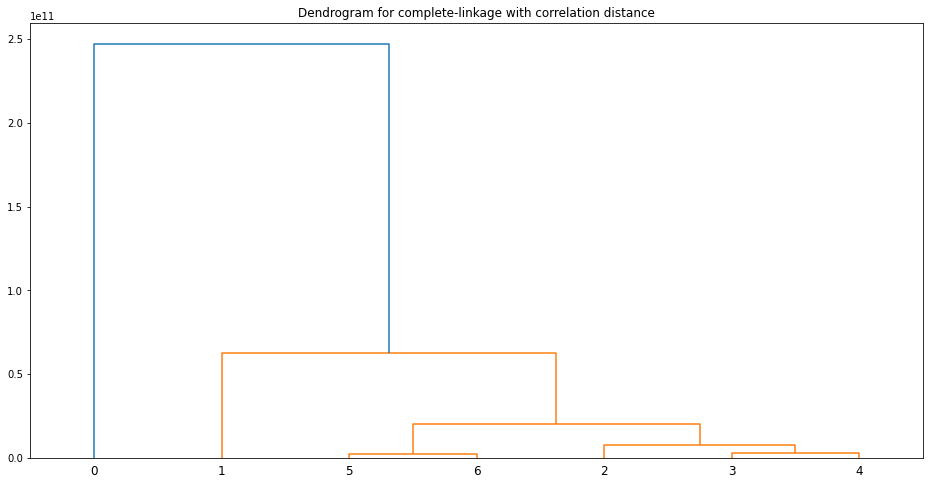

In [6]:
linkage_matrix_complete = clustering.hierarchical_clustering(distance_matrix = distance_matrix)

/home/jovyan/conda-envs/timeseries/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:446: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


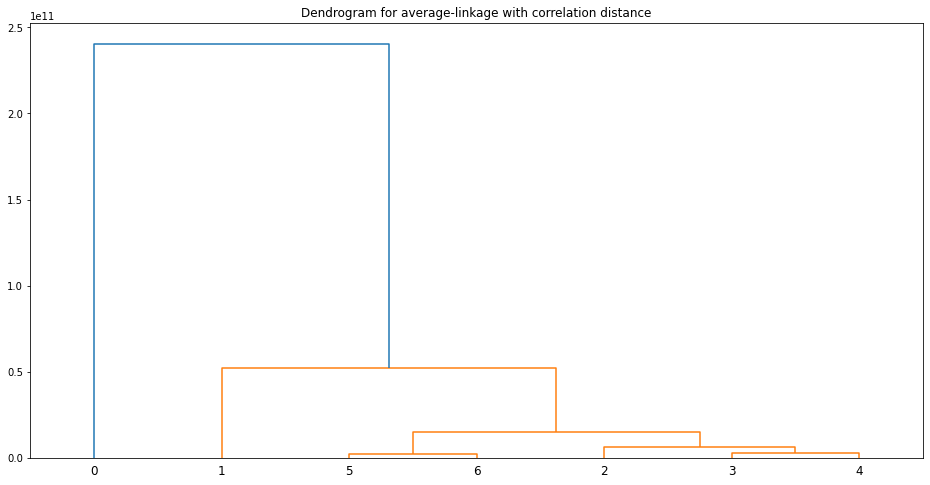

In [7]:
linkage_matrix_average = clustering.hierarchical_clustering(distance_matrix, method = 'average' )

/home/jovyan/conda-envs/timeseries/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


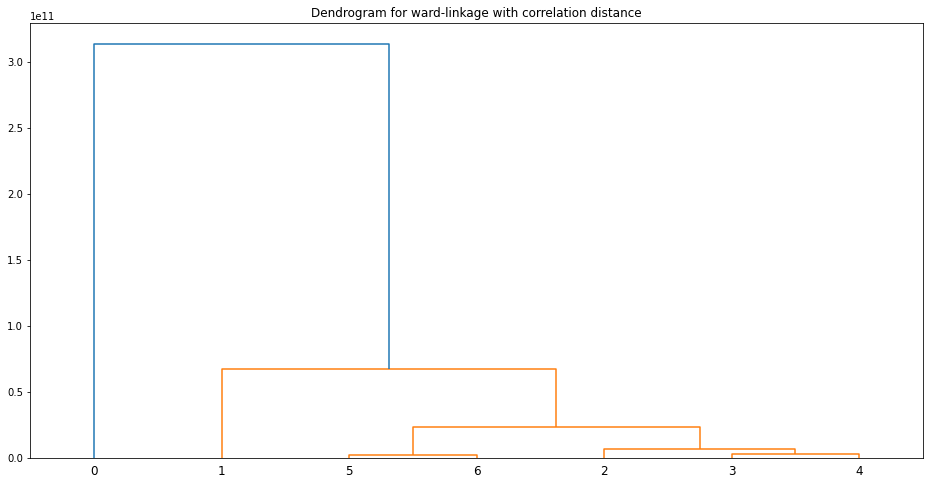

In [8]:
linkage_matrix_ward = clustering.hierarchical_clustering(distance_matrix, method = 'ward' )

In [13]:
from scipy.cluster.hierarchy import fcluster

# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters

cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters

cluster_labels = fcluster(linkage_matrix, 800, criterion='distance')

print(np.unique(cluster_labels))

#>> 2 unique clusters

NameError: name 'linkage_matrix' is not defined

In [ ]:
def 